<a href="https://colab.research.google.com/github/AntoninaRemizova/DA/blob/main/%D0%A0%D0%B5%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%D0%B0_%D0%A0%D0%98%D0%A1_23_3_%D0%94%D0%97%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score

url = "https://raw.githubusercontent.com/AntoninaRemizova/DA/refs/heads/main/%D0%A0%D0%B5%D0%BC%D0%B8%D0%B7%D0%BE%D0%B2%D0%B0%20%D0%90%D0%BD%D1%82%D0%BE%D0%BD%D0%B8%D0%BD%D0%B0%20%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%BD%D0%B0_cards.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,456458,4.368054,1.271379,0.565756,1.0,0.0,0.0,1.0,0.0
1,938299,2.248774,1.852881,1.779738,1.0,1.0,0.0,1.0,0.0
2,608622,4.816733,0.464773,1.731767,1.0,0.0,0.0,1.0,0.0
3,948495,388.698599,1.012922,0.124808,1.0,0.0,0.0,1.0,1.0
4,449930,0.861514,2.685281,2.711747,0.0,0.0,0.0,1.0,0.0


# Задача 1

## Вопрос 1
Запишите, чему равна доля мошеннических операций в данных. Укажите долю с точностью до сотых.

In [2]:
print(round((df['fraud'].mean()), 2))

0.08


## Задача 2
Модель 1:
* расстояние от дома до места совершения транзакции;
* отношение объема транзакции к медианной сумме покупок;
* были ли покупки у этого продавца ранее.
---
Модель 2:
* расстояние от места совершения транзакции до места совершения последней транзакции;
* отношение объема транзакции к медианной сумме покупок;
* были ли покупки у этого продавца ранее;
* использовался ли ПИН-код при оплате.

## Вопрос 2
Укажите с точностью до сотых коэффициент из выдачи модели 1 при переменной расстояние от дома до места совершения транзакции.

In [3]:
m1 = smf.logit('fraud ~ distance_from_home + ratio_to_median_purchase_price + repeat_retailer', data = df).fit()
print(m1.summary())

Optimization terminated successfully.
         Current function value: 0.197915
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                 1800
Model:                          Logit   Df Residuals:                     1796
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.3100
Time:                        08:56:47   Log-Likelihood:                -356.25
converged:                       True   LL-Null:                       -516.30
Covariance Type:            nonrobust   LLR p-value:                 4.403e-69
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -3.7683      0.320    -11.776     

## Вопрос 3
Укажите с точностью до сотых коэффициент из выдачи модели 2 при переменной отношение объема транзакции к медианной стоимости покупок.

In [4]:
m2 = smf.logit('fraud ~ distance_from_last_transaction + ratio_to_median_purchase_price + repeat_retailer + used_pin_number', data = df).fit()
print(m2.summary())

Optimization terminated successfully.
         Current function value: 0.197704
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                 1800
Model:                          Logit   Df Residuals:                     1795
Method:                           MLE   Df Model:                            4
Date:                Tue, 17 Jun 2025   Pseudo R-squ.:                  0.3107
Time:                        08:56:48   Log-Likelihood:                -355.87
converged:                       True   LL-Null:                       -516.30
Covariance Type:            nonrobust   LLR p-value:                 3.397e-68
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -3.8516      0.336    -11.452    

# Задача 3
Постройте для модели 1 и модели 2 ROC-кривые (две кривые на одном графике вместе с прямой, соответствующей случайному классификатору) и вычислите для каждой модели значение метрики AUC.

## Вопрос 4
Прикрепите изображение с полученным графиком.

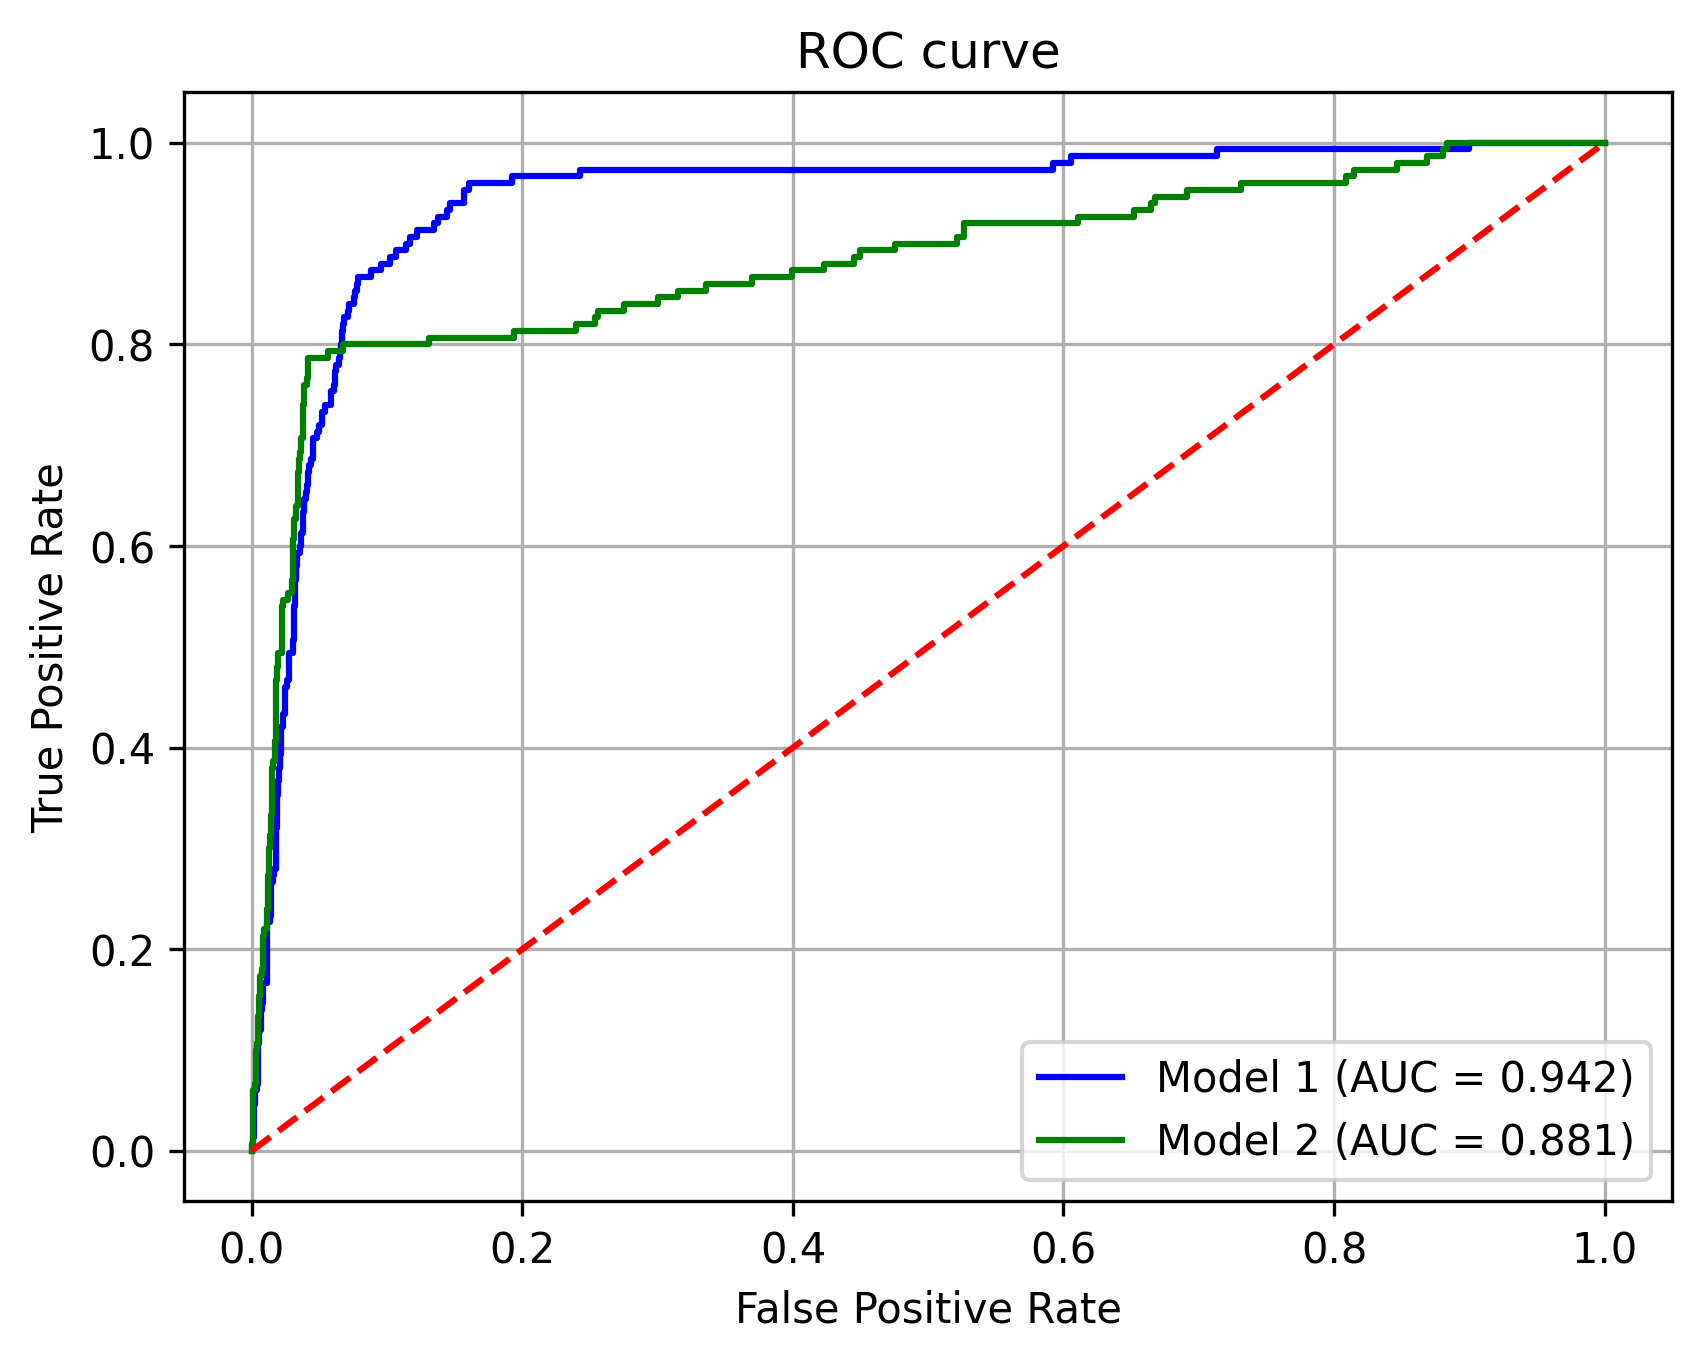

In [5]:
df['prob1'] = m1.predict()
df['prob2'] = m2.predict()
fpr1, tpr1, _ = roc_curve(df['fraud'], df['prob1'])
fpr2, tpr2, _ = roc_curve(df['fraud'], df['prob2'])
auc1 = roc_auc_score(df['fraud'], df['prob1'])
auc2 = roc_auc_score(df['fraud'], df['prob2'])

plt.figure(dpi = 300)
plt.plot(fpr1, tpr1, label = f'Model 1 (AUC = {auc1:.3f})', color = 'blue')
plt.plot(fpr2, tpr2, label = f'Model 2 (AUC = {auc2:.3f})', color = 'green')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid(True)
plt.legend()
plt.show()

## Вопрос 5
Укажите с точностью до тысячных значение AUC для модели 1.

In [6]:
print(round(auc1, 3))

0.942


## Вопрос 6
Укажите с точностью до тысячных значение AUC для модели 2.

In [7]:
print(round(auc2, 3))

0.881


# Задача 4
Опираясь на результаты предыдущей задачи, выберите модель с лучшей предсказательной силой и вычислите предельные эффекты независимых переменных на вероятность мошеннической операции для медианной транзакции.

In [8]:
best_model = m1

## Вопрос 7
Укажите характеристики медианной транзакции (медианы независимых переменных в модели).


In [9]:
median_transaction = df[['distance_from_home', 'ratio_to_median_purchase_price', 'repeat_retailer']].median()
print(median_transaction)

distance_from_home                9.887376
ratio_to_median_purchase_price    1.010320
repeat_retailer                   1.000000
dtype: float64


## Вопрос 8
Укажите, эффекты каких независимых переменных можно считать статистически значимыми, то есть отличными от 0, на уровне значимости 5%. Перечислите их названия (как в выдаче).


In [10]:
marg_effect = best_model.get_margeff(at = 'median')
print(marg_effect.summary())

        Logit Marginal Effects       
Dep. Variable:                  fraud
Method:                          dydx
At:                            median
                                    dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
distance_from_home                 0.0003   4.23e-05      6.724      0.000       0.000       0.000
ratio_to_median_purchase_price     0.0131      0.002      8.611      0.000       0.010       0.016
repeat_retailer                   -0.0109      0.008     -1.347      0.178      -0.027       0.005


distance_from_home, ratio_to_median_purchase_price

## Вопрос 9
Укажите значение предельного эффекта при переменной отношение объема транзакции к медианной сумме покупок. Проинтерпретируйте содержательно это значение, объясните, что оно показывает (интерпретируйте в любом случае, даже если эффект в вашей модели оказался статистически незначимым).

Увеличение отношения объема транзакции к медианной сумме покупок на 1 у.е. при фиксированных медианных значениях других переменных статистически значимо повышает вероятность мошенничества на 1.31%, что указывает на повышенный риск для более крупных транзакций

## Вопрос 10
Укажите значение предельного эффекта при бинарной независимой переменной в выбранной модели. Проинтерпретируйте содержательно это значение, объясните, что оно показывает (интерпретируйте в любом случае, даже если эффект в вашей модели оказался статистически незначимым).

Переход от покупок у новых продавцов к знакомым при фиксированных медианных значениях других переменных статистически (не)значимо снижает вероятность
мошенничества на 1.09%, что указывает на меньший риск мошенничества при работе с проверенными продавцами

# Задача 5
Выполните классификацию всех транзакций в данных с помощью выбранной модели, приняв пороговое значение вероятности для класса 1 равным базовому значению 0.5.

In [11]:
tab = best_model.pred_table(threshold = 0.5)
print(tab)
TN = tab[0, 0]
TP = tab[1, 1]
FN = tab[1, 0]
FP = tab[0, 1]

[[1626.   24.]
 [ 110.   40.]]


## Вопрос 11
Запишите значение точности (accuracy) классификации с точностью до сотых.

In [12]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(round(accuracy, 2))

0.93


## Вопрос 12
Запишите значение чувствительности модели с точностью до сотых.

In [13]:
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
print(round(sensitivity, 2))

0.27


## Вопрос 13
Запишите значение специфичности модели с точностью до сотых.

In [14]:
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
print(round(specificity, 2))

0.99


# Задача 6
Задача выявления аномалий (а к ним, в частности, относится и выявление случаев мошенничества) отличается от стандартных задач классификации. Одно из отличий заключается в том, что при выявлении аномалий мы имеем дело со случаем несбалансированных классов – число аномалий обычно сильно меньше числа «нормальных» наблюдений. Поэтому пороговое значение вероятности 0.5 вряд ли приведет к хорошему качеству классификации.

Измените пороговое значение вероятности и повторите классификацию транзакций в данных с использованием обновленного порогового значения.

In [25]:
thresholds = np.linspace(0, 1, 100)
f2_scores = []

for t in thresholds:
    tab = best_model.pred_table(threshold = t)
    TN = tab[0, 0]
    TP = tab[1, 1]
    FN = tab[1, 0]
    FP = tab[0, 1]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f2 = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) > 0 else 0
    f2_scores.append(f2)

optimal_threshold = thresholds[np.argmax(f2_scores)]
tab_new = best_model.pred_table(threshold = optimal_threshold)
print(tab_new)
TN_new = tab_new[0, 0]
TP_new = tab_new[1, 1]
FN_new = tab_new[1, 0]
FP_new = tab_new[0, 1]

[[1519.  131.]
 [  20.  130.]]


## Вопрос 14
Укажите новое пороговое значение и кратко прокомментируйте, почему выбрали его.

In [24]:
print(round(optimal_threshold, 1))

0.1


Новое пороговое значение было определено путем максимизации F2-меры, которая уделяет приоритетное внимание полноте выявления, позволяя находить максимальное количество мошеннических операций, ценой увеличения ложных срабатываний.

## Вопрос 15
Запишите значение точности (accuracy) обновленной классификации с точностью до сотых.

In [26]:
accuracy_new = (TP_new + TN_new) / (TP_new + TN_new + FP_new + FN_new)
print(round(accuracy_new, 2))

0.92


## Вопрос 16
Запишите обновленное значение чувствительности модели с точностью до сотых.

In [27]:
sensitivity_new = TP_new / (TP_new + FN_new) if (TP_new + FN_new) > 0 else 0
print(round(sensitivity_new, 2))

0.87


## Вопрос 17
Запишите обновленное значение специфичности модели с точностью до сотых.

In [28]:
specificity_new = TN_new / (TN_new + FP_new) if (TN_new + FP_new) > 0 else 0
print(round(specificity_new, 2))

0.92


# Задача 7

## Вопрос 18
Запишите предсказанное значение вероятности, согласно вашей итоговой модели, для транзакции с медианными характеристиками.

In [37]:
best_model.predict(median_transaction)

,0
0,0.027243


## Вопрос 19
К какому классу (0 – обычная или 1 – мошенническая) будет отнесена такая транзакция?

Медианная транзакция будет отнесена к классу 0, т.к. вероятность меньше порогового значения